# モデル計算結果
1. Horiuchi and Iwamori, 2016
2. 各物性効果適用後
3. 観測との比較

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mpl_toolkits.axes_grid1
import pandas as pd
import numpy as np
from scipy import interpolate 

In [2]:
beta=5.0
ro=0.9
alpha=0.10
gamma_k = 0.815/alpha + 1.68*alpha - 0.000758*(alpha**(-1.77))
gamma_n = 0.36/alpha + 1.74 - 0.232*(alpha**(-0.535))
a1 = (beta-1.)*gamma_k/(gamma_k+(beta-1.0))+ 4.0*0.6*gamma_n/3.0
dlnvp = (a1/(1.0+4.*0.6/3.0)-(1.0-ro))/2.0
dlnvs = (gamma_n-(1.0-ro))/2.0
dlnvsp = dlnvs/dlnvp
dlnvp,dlnvs,dlnvsp,gamma_k,gamma_n

(1.7089408595534232,
 2.2223893676061177,
 1.3004483772404316,
 8.273365650924044,
 4.544778735212235)

In [3]:
def reshape100100(df,index):
    return df[index].values.reshape(100, 100) # .reshape(100, 100)は100×100の形状に変換するメソッド
def color_plot_cont(place,X,Y,variable,cmap0,vmin0,vmax0,title): # カラーマップ
    global fig,plt
    ax = fig.add_subplot(3,2,place)
    intensity_map = ax.pcolormesh(X, Y, variable, cmap=cmap0, vmin=vmin0, vmax=vmax0) # cmap=jetでも可,gist_earth
    divider = make_axes_locatable(ax)
    colorbar_ax = divider.append_axes("right", "5%", pad="3%")
    fig.add_axes(colorbar_ax)
    fig.colorbar(intensity_map, cax=colorbar_ax)
    #ax.set_title(title); 
    ax.legend(loc='lower right', fontsize=18, title=title)
    ax.set_xlabel("(km)"); ax.set_ylabel("(km)")
    cont=ax.contour(X,Y,variable,levels=8,colors=['black']) # 等高線
    ax.clabel(cont, fmt='%1.1f', fontsize=14)
    ax.set_xlim(500, 0); ax.set_ylim(300, 0)
    #ax.set_xlim(350, 0); ax.set_ylim(200, 0)
    #ax.set_aspect('equal')
    return
def color_plot(place,X,Y,variable,cmap0,vmin0,vmax0,title): # カラーマップ
    global fig,plt
    ax = fig.add_subplot(3,2,place)
    intensity_map = ax.pcolormesh(X, Y, variable, cmap=cmap0, vmin=vmin0, vmax=vmax0) # cmap=jetでも可,gist_earth
    divider = make_axes_locatable(ax)
    colorbar_ax = divider.append_axes("right", "5%", pad="3%")
    fig.add_axes(colorbar_ax)
    fig.colorbar(intensity_map, cax=colorbar_ax)
    #ax.set_title(title); 
    ax.legend(loc='lower right', fontsize=18, title=title)
    #ax.text(100, 100, title, ha='center', fontsize=18);#, color = 'w'
    ax.set_xlabel("(km)"); ax.set_ylabel("(km)")
    #ax.axhspan(0, 30, color = "w") #  地殻(30 km)を削る
    ax.set_xlim(500, 0); ax.set_ylim(300, 0)
    #ax.set_xlim(350, 0); ax.set_ylim(200, 0)
    #ax.set_aspect('equal')
    ax.grid()
    return

## 1. Horiuchi and Iwamori (2016)

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


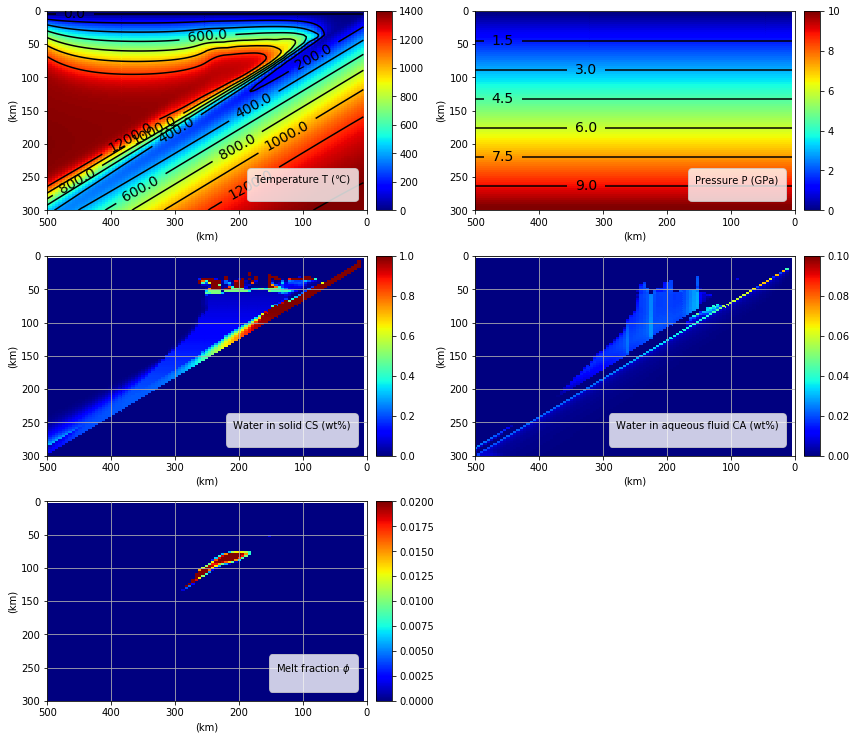

In [4]:
t_pt="135075"
df_vspm=pd.read_csv(t_pt+'premelting_melt_t.csv')
df_vsp=pd.read_csv(t_pt+'premelting_t.csv')
df_vsm=pd.read_csv(t_pt+'melt_t.csv')

X = df_vspm['i'].values.reshape(100, 100) # .reshape(100, 100)は100×100の形状に変換するメソッド
Y = df_vspm['j'].values.reshape(100, 100)
Zt = df_vspm['Zt'].values.reshape(100, 100)
P = df_vspm['P'].values.reshape(100, 100)
serp = df_vspm['serp'].values.reshape(100, 100)
Tdash = df_vsp['T(K)/Tm(K)'].values.reshape(100, 100)
Tdash2 = df_vsp['T(K)/Tliq(K)'].values.reshape(100, 100)
Tsol = df_vsp['Tm(degreeC)'].values.reshape(100, 100)
Tliq = df_vsp['Tliq(degreeC)'].values.reshape(100, 100)
phi = df_vsm['phi'].values.reshape(100, 100)
rho = df_vspm['rho_VRH'].values.reshape(100, 100)
CS = df_vsm['CS'].values.reshape(100, 100)
CA = df_vsm['CA'].values.reshape(100, 100)

fig = plt.figure(figsize=(12,10.368))
#color_plot_cont(1,X,Y,phi,'jet',0,0.06,'Temperature T (℃)')
#color_plot_cont(2,X,Y,XXX,'jet',0,0.06,'Temperature T (℃)')
#color_plot(3,X,Y,phi2,'jet',0,0.06,'Water in solid CS (wt%)')
#color_plot_cont(4,X,Y,CS,'jet',0,0.1,'Serpentine (0 or 1)')
color_plot_cont(1,X,Y,Zt,'jet',0,1400,'Temperature T (℃)')
color_plot_cont(2,X,Y,P,'jet',0,10,'Pressure P (GPa)')
color_plot(3,X,Y,CS*100,'jet',0,1,'Water in solid CS (wt%)')
color_plot(4,X,Y,CA*100,'jet',0,0.1,'Water in aqueous fluid CA (wt%)')
color_plot(5,X,Y,phi,'jet',0,0.02,'Melt fraction $\phi$')
#fig.legend(title=titlename)
fig.tight_layout() #plt.subplots_adjust(top=0.90)
#plt.savefig(file1)
plt.savefig(t_pt+".png")
plt.show()

## 2. 各物性効果適用後
各計算結果につき、40×3=120個の図

df_vsm["CS"].max()

In [5]:
def color_plot_cont(place,X,Y,variable,cmap0,vmin0,vmax0,title): # カラーマップ
    ax = fig.add_subplot(10,4,place)
    intensity_map = ax.pcolormesh(X, Y, variable, cmap=cmap0, vmin=vmin0, vmax=vmax0) # cmap=jetでも可,gist_earth
    divider = make_axes_locatable(ax)
    colorbar_ax = divider.append_axes("right", "5%", pad="3%")
    fig.add_axes(colorbar_ax)
    fig.colorbar(intensity_map, cax=colorbar_ax)
    #ax.set_title(title); 
    ax.legend(loc='lower right', fontsize=18, title=title)
    ax.set_xlabel("(km)"); ax.set_ylabel("(km)")
    cont=ax.contour(X,Y,variable,levels=8,colors=['black']) # 等高線
    ax.clabel(cont, fmt='%1.1f', fontsize=14)
    ax.set_xlim(350, 0); ax.set_ylim(200, 0)
    #ax.set_aspect('equal')
    return

In [6]:
def color_plot(place,X,Y,variable,cmap0,vmin0,vmax0,title,nrows=10, ncols=4): # カラーマップ
    ax = fig.add_subplot(nrows,ncols,place)
    intensity_map = ax.pcolormesh(X, Y, variable, cmap=cmap0, vmin=vmin0, vmax=vmax0) # cmap=jetでも可,gist_earth
    divider = make_axes_locatable(ax)
    colorbar_ax = divider.append_axes("right", "5%", pad="3%")
    fig.add_axes(colorbar_ax)
    fig.colorbar(intensity_map, cax=colorbar_ax)
    #ax.set_title(title); 
    ax.legend(loc='lower right', fontsize=18, title=title)
    #ax.text(100, 100, title, ha='center', fontsize=18);#, color = 'w'
    ax.set_xlabel("(km)"); ax.set_ylabel("(km)")
    ax.axhspan(0, 30, color = "w") #  地殻(30 km)を削る
    ax.fill([300*np.sqrt(3),0,0],[300,0,300],color= "w") #  右下(海洋プレートより下)を削る
    ax.set_xlim(350, 0); ax.set_ylim(200, 0)
    #ax.set_aspect('equal')
    ax.grid()
    return
def color_plot_meanall(place,X,Y,variable,cmap0,vmin0,vmax0,title,nrows=10, ncols=4): # カラーマップ
    ax = fig.add_subplot(nrows,ncols,place)
    intensity_map = ax.pcolormesh(X, Y, variable, cmap=cmap0, vmin=vmin0, vmax=vmax0) # cmap=jetでも可,gist_earth
    divider = make_axes_locatable(ax)
    colorbar_ax = divider.append_axes("right", "5%", pad="3%")
    fig.add_axes(colorbar_ax)
    fig.colorbar(intensity_map, cax=colorbar_ax)
    #ax.set_title(title); 
    ax.legend(loc='lower right', fontsize=18, title=title)
    #ax.text(100, 100, title, ha='center', fontsize=18);#, color = 'w'
    ax.set_xlabel("(km)"); ax.set_ylabel("(km)")
    ax.axhspan(0, 30, color = "w") #  地殻(30 km)を削る
    ax.set_xlim(350, 0); ax.set_ylim(200, 0)
    #ax.set_aspect('equal')
    ax.grid()
    return

In [7]:
def profile(place):
    #linelist=[202,249,301]
    # Distance from the surface to the oceanic plate.100,120,140,160km.
    #(Horizontal distance, Distance from the surface to the oceanic plate)
    linelist=[(171,100),(207,120),(239,140),(275,160)]
    for line, distance in linelist:
        ax = fig.add_subplot(10,4,place)
        QP202=df_vsp[df_vsp['i'].astype(int)==line]['Qinv_VRH']
        QS202=QP202*4.0/9.0
        depth=df_vsp[df_vsp['i'].astype(int)==line]['j']
        ax.plot(QP202,depth)
        ax.plot(QS202,depth,label=line)
        ax.invert_yaxis()
        ax.set_ylabel("(km)");
        ax.set_xlim(0, 0.014); ax.set_ylim(200, 0);
        plt.legend(title='Distance from the surface to the oceanic plate' + str(distance)+' km', loc='lower left')
        ax.grid()
        place=place+1
def profile_velocity(place,df,vmin,vmax,vindex1,vindex2,vname1,vname2):
    #linelist=[202,249,301]
    # Distance from the surface to the oceanic plate.100,120,140,160km.
    #(Horizontal distance, Distance from the surface to the oceanic plate)
    linelist=[(171,100),(207,120),(239,140),(275,160)]
    for line, distance in linelist:
        ax = fig.add_subplot(10,4,place)
        v1=df[df['i'].astype(int)==line][vindex1]
        v2=df[df['i'].astype(int)==line][vindex2]
        depth=df[df['i'].astype(int)==line]['j']
        ax.plot(v1,depth,label=vname1)
        ax.plot(v2,depth,label=vname2)
        ax.invert_yaxis()
        ax.set_xlabel("(km/s)"); ax.set_ylabel("(km)");
        ax.set_xlim(vmin,vmax); ax.set_ylim(200, 0);
        leg=ax.legend(title=str(distance)+' km', loc='lower left')
        leg.get_frame().set_alpha(0.5) # 凡例の背景の透明度
        ax.grid()
        place=place+1

In [8]:
def color_plot_time(sub_d): # カラーマップ
    uniq=sub_d['tott'].unique()
    for uniq_i in range(10):
        ax = fig.add_subplot(10,4,uniq_i+29)
        sub_d2=sub_d[sub_d['tott']==uniq[uniq_i]]
        X = sub_d2['i'].values.reshape(100, 100) # .reshape(100, 100)は100×100の形状に変換するメソッド
        Y = sub_d2['j'].values.reshape(100, 100)
        Zsf = sub_d2['Zsf'].values.reshape(100, 100)
        Zt = sub_d2['Zt'].values.reshape(100, 100)
        Zz = sub_d2['Zz'].values.reshape(100, 100)
        # stream function 黒線
        cont=ax.contour(X,Y,Zsf,levels=10,colors=['black'])
        ax.clabel(cont, cont.levels[::2], fmt='%1.2f', fontsize=14)
        # temperature 赤線
        cont=ax.contour(X,Y,Zt,levels=8,colors=['red'])
        ax.clabel(cont, cont.levels[::1], fmt='%1.1f', fontsize=14)
        # viscosity カラーマップ
        intensity_map = ax.pcolormesh(X, Y, Zz, cmap='terrain') # cmap=jetでも可,gist_earth
        intensity_map.set_clim(-0.04,0.11)
        divider = make_axes_locatable(ax)
        colorbar_ax = divider.append_axes("right", "5%", pad="3%")
        #fig.add_axes(colorbar_ax)
        fig.colorbar(intensity_map, cax=colorbar_ax)
        # 軸の設定
        ax.invert_xaxis(); ax.invert_yaxis()
        ax.legend(loc='lower right', fontsize=14, \
                  title="Stream function (black)\n& Temperature (red)\n& Viscosity (colormap) \nElapsed time="+str(int(uniq[uniq_i]*2853.88127854))+" Myr")
        ax.set_xlabel("(km)"); ax.set_ylabel("(km)")
        ax.set_aspect(1)
    #plt.savefig("/Users/kunugimitsu/Documents/special/pic/programdir_loop300327_tott9_671057.png")
    #plt.savefig("/Users/kunugimitsu/Documents/special/pic/programcalcteset_loop300726_tott9_600985.png")
    #plt.savefig("programdir_t_pt_1300_"+str(int(uniq_i*2853.88127854))+".png")
    return

In [9]:
def reshape100100(df,index):
    return df[index].values.reshape(100, 100) # .reshape(100, 100)は100×100の形状に変換するメソッド

def perturbation(df,vpname='VP',vsname='VS'):
    VP=reshape100100(df ,vpname)
    VS=reshape100100(df ,vsname)
    VPmw,VSmw=np.zeros((100, 100)),np.zeros((100, 100))
    for i in range(100):
        VPmw[i]=VP.T[i]/np.mean(VP.T[i][i:100])-1.0
        VSmw[i]=VS.T[i]/np.mean(VS.T[i][i:100])-1.0
        VPmw[i][0:i] = 0.0
        VSmw[i][0:i] = 0.0
    VPma = (VP/np.mean(VP, axis=0)-1.0)*100.0
    VSma = (VS/np.mean(VS, axis=0)-1.0)*100.0
    return VPmw.T*100.0, VSmw.T*100.0, VPma, VSma

In [10]:
vcol='jet_r' # 偏差VP, VSのカラーバー
absvpmin=7.2 # 絶対値VPのカラーバー
absvpmax=8.0
absvsmin=3.8 # 絶対値VSのカラーバー
absvsmax=4.5
vpvsmin=1.65 # VP/VSのカラーバー
vpvsmax=1.85
vpvscol='jet'
MPS='(Melt + Premelting \n+ Serpentine)'
MP='(Melt + Premelting)'

In [11]:
t_ptlist=["135075"]

In [ ]:
for t_pt in t_ptlist:
    titlename="potential temperature="+t_pt[:4] # 図の右上に温度を記入
    file1="1-t_pt"+t_pt+".png"
    file2="2-t_pt"+t_pt+".png"
    file3="3-t_pt"+t_pt+".png"
    
    df_vspm=pd.read_csv(t_pt+'premelting_melt_t.csv')
    df_vsp=pd.read_csv(t_pt+'premelting_t.csv')
    df_vsm=pd.read_csv(t_pt+'melt_t.csv')
    
    X = df_vspm['i'].values.reshape(100, 100) # .reshape(100, 100)は100×100の形状に変換するメソッド
    Y = df_vspm['j'].values.reshape(100, 100)
    Zt = df_vspm['Zt'].values.reshape(100, 100)
    P = df_vspm['P'].values.reshape(100, 100)
    Tdash = df_vsp['T(K)/Tm(K)'].values.reshape(100, 100)
    Tdash2 = df_vsp['T(K)/Tliq(K)'].values.reshape(100, 100)
    Tsol = df_vsp['Tm(degreeC)'].values.reshape(100, 100)
    Tliq = df_vsp['Tliq(degreeC)'].values.reshape(100, 100)
    serp = df_vspm['serp'].values.reshape(100, 100)
    phi = df_vsm['phi'].values.reshape(100, 100)
    rho = df_vspm['rho'].values.reshape(100, 100)
    K = df_vspm['KSU'].values.reshape(100, 100)
    G = df_vspm['GU'].values.reshape(100, 100)
    rhoVRH = df_vspm['rho_VRH'].values.reshape(100, 100)
    KVRH = df_vspm['KS_VRH'].values.reshape(100, 100)
    GVRH = df_vspm['G_VRH'].values.reshape(100, 100)
    CS = df_vsm['CS'].values.reshape(100, 100)
    CA = df_vsm['CA'].values.reshape(100, 100)
    
    fig = plt.figure(figsize=(20, 28.28))
    VPmw, VSmw, VPma, VSma = perturbation(df_vspm,vpname='serpVP',vsname='serpVS')
    color_plot(1,X,Y,VPmw,vcol,-6.0,6.0,'$V_P$ (mean wedge)\n'+MPS+' (%)')
    color_plot(2,X,Y,VSmw,vcol,-6.0,6.0,'$V_S$ (mean wedge)\n'+MPS+' (%)')
    color_plot_meanall(21,X,Y,VPma,vcol,-6.0,6.0,'$V_P$ (mean all)\n'+MPS+' (%)')
    color_plot_meanall(22,X,Y,VSma,vcol,-6.0,6.0,'$V_S$ (mean all)\n'+MPS+' (%)')
    VPmw, VSmw, VPma, VSma = perturbation(df_vspm,vpname='serpVP_VRH',vsname='serpVS_VRH')
    color_plot(3,X,Y,VPmw,vcol,-6.0,6.0,'$V^{VRH}_P$ (mean wedge)\n'+MPS+' (%)')
    color_plot(4,X,Y,VSmw,vcol,-6.0,6.0,'$V^{VRH}_S$ (mean wedge)\n'+MPS+' (%)')
    color_plot_meanall(23,X,Y,VPma,vcol,-6.0,6.0,'$V^{VRH}_P$ (mean all)\n'+MPS+' (%)')
    color_plot_meanall(24,X,Y,VSma,vcol,-6.0,6.0,'$V^{VRH}_S$ (mean all)\n'+MPS+' (%)')
    VPmw, VSmw, VPma, VSma = perturbation(df_vspm)
    color_plot(5,X,Y,VPmw,vcol,-6.0,6.0,'$V_P$ (mean wedge)\n'+MP+' (%)')
    color_plot(6,X,Y,VSmw,vcol,-6.0,6.0,'$V_S$ (mean wedge)\n'+MP+' (%)')
    color_plot_meanall(25,X,Y,VPma,vcol,-6.0,6.0,'$V_P$ (mean all)\n'+MP+' (%)')
    color_plot_meanall(26,X,Y,VSma,vcol,-6.0,6.0,'$V_S$ (mean all)\n'+MP+' (%)')
    VPmw, VSmw, VPma, VSma = perturbation(df_vspm,vpname='VP_VRH',vsname='VS_VRH')
    color_plot(7,X,Y,VPmw,vcol,-6.0,6.0,'$V^{VRH}_P$ (mean wedge)\n'+MP+' (%)')
    color_plot(8,X,Y,VSmw,vcol,-6.0,6.0,'$V^{VRH}_S$ (mean wedge)\n'+MP+' (%)')
    color_plot_meanall(27,X,Y,VPma,vcol,-6.0,6.0,'$V^{VRH}_P$ (mean all)\n'+MP+' (%)')
    color_plot_meanall(28,X,Y,VSma,vcol,-6.0,6.0,'$V^{VRH}_S$ (mean all)\n'+MP+' (%)')
    VPmw, VSmw, VPma, VSma = perturbation(df_vsm)
    color_plot(9,X,Y,VPmw,vcol,-6.0,6.0,'$V_P$ (mean wedge)\n(Melt) (%)')
    color_plot(10,X,Y,VSmw,vcol,-6.0,6.0,'$V_S$ (mean wedge)\n(Melt) (%)')
    color_plot_meanall(29,X,Y,VPma,vcol,-6.0,6.0,'$V_P$ (mean all)\n(Melt) (%)')
    color_plot_meanall(30,X,Y,VSma,vcol,-6.0,6.0,'$V_S$ (mean all)\n(Melt) (%)')
    VPmw, VSmw, VPma, VSma = perturbation(df_vsm,vpname='VP_VRH',vsname='VS_VRH')
    color_plot(11,X,Y,VPmw,vcol,-6.0,6.0,'$V^{VRH}_P$ (mean wedge)\n(Melt) (%)')
    color_plot(12,X,Y,VSmw,vcol,-6.0,6.0,'$V^{VRH}_S$ (mean wedge)\n(Melt) (%)')
    color_plot_meanall(31,X,Y,VPma,vcol,-6.0,6.0,'$V^{VRH}_P$ (mean all)\n(Melt) (%)')
    color_plot_meanall(32,X,Y,VSma,vcol,-6.0,6.0,'$V^{VRH}_S$ (mean all)\n(Melt) (%)')
    VPmw, VSmw, VPma, VSma = perturbation(df_vsp)
    color_plot(13,X,Y,VPmw,vcol,-6.0,6.0,'$V_P$ (mean wedge)\n(Premelting) (%)')
    color_plot(14,X,Y,VSmw,vcol,-6.0,6.0,'$V_S$ (mean wedge)\n(Premelting) (%)')
    color_plot_meanall(33,X,Y,VPma,vcol,-6.0,6.0,'$V_P$ (mean all)\n(Premelting) (%)')
    color_plot_meanall(34,X,Y,VSma,vcol,-6.0,6.0,'$V_S$ (mean all)\n(Premelting) (%)')
    VPmw, VSmw, VPma, VSma = perturbation(df_vsp,vpname='VP_VRH',vsname='VS_VRH')
    color_plot(15,X,Y,VPmw,vcol,-6.0,6.0,'$V^{VRH}_P$ (mean wedge)\n(Premelting) (%)')
    color_plot(16,X,Y,VSmw,vcol,-6.0,6.0,'$V^{VRH}_S$ (mean wedge)\n(Premelting) (%)')
    color_plot_meanall(35,X,Y,VPma,vcol,-6.0,6.0,'$V^{VRH}_P$ (mean all)\n(Premelting) (%)')
    color_plot_meanall(36,X,Y,VSma,vcol,-6.0,6.0,'$V^{VRH}_S$ (mean all)\n(Premelting) (%)')
    VPmw, VSmw, VPma, VSma = perturbation(df_vsp,vpname='VPU',vsname='VSU')
    color_plot(17,X,Y,VPmw,vcol,-6.0,6.0,'$V_{PU}$ (mean wedge) (%)')
    color_plot(18,X,Y,VSmw,vcol,-6.0,6.0,'$V_{SU}$ (mean wedge) (%)')
    color_plot_meanall(37,X,Y,VPma,vcol,-6.0,6.0,'$V_{PU}$ (mean all) (%)')
    color_plot_meanall(38,X,Y,VSma,vcol,-6.0,6.0,'$V_{SU}$ (mean all) (%)')
    VPmw, VSmw, VPma, VSma = perturbation(df_vsp,vpname='VP_VRHU',vsname='VS_VRHU')
    color_plot(19,X,Y,VPmw,vcol,-6.0,6.0,'$V^{VRH}_{PU}$ (mean wedge) (%)')
    color_plot(20,X,Y,VSmw,vcol,-6.0,6.0,'$V^{VRH}_{SU}$ (mean wedge) (%)')
    color_plot_meanall(39,X,Y,VPma,vcol,-6.0,6.0,'$V^{VRH}_{PU}$ (mean all) (%)')
    color_plot_meanall(40,X,Y,VSma,vcol,-6.0,6.0,'$V^{VRH}_{SU}$ (mean all) (%)')
    fig.legend(title=titlename)
    fig.tight_layout() #plt.subplots_adjust(top=0.90)
    plt.savefig(file1)
    plt.show()
    
    fig = plt.figure(figsize=(20, 28.28))
    VP=reshape100100(df_vspm ,'serpVP'); VS=reshape100100(df_vspm ,'serpVS')
    color_plot(1,X,Y,VP,'RdYlBu',absvpmin,absvpmax,'$V_P$'+MPS+' (km/s)')
    color_plot(2,X,Y,VS,'RdYlBu',absvsmin,absvsmax,'$V_S$'+MPS+' (km/s)')
    VP=reshape100100(df_vspm ,'serpVP_VRH'); VS=reshape100100(df_vspm ,'serpVS_VRH')
    color_plot(3,X,Y,VP,'RdYlBu',absvpmin,absvpmax,'$V^{VRH}_P$'+MPS+' (km/s)')
    color_plot(4,X,Y,VS,'RdYlBu',absvsmin,absvsmax,'$V^{VRH}_S$'+MPS+' (km/s)')
    VP=reshape100100(df_vspm ,'VP'); VS=reshape100100(df_vspm ,'VS')
    color_plot(5,X,Y,VP,'RdYlBu',absvpmin,absvpmax,'$V_P$'+MP+' (km/s)')
    color_plot(6,X,Y,VS,'RdYlBu',absvsmin,absvsmax,'$V_S$'+MP+' (km/s)')
    VP=reshape100100(df_vspm ,'VP_VRH'); VS=reshape100100(df_vspm ,'VS_VRH')
    color_plot(7,X,Y,VP,'RdYlBu',absvpmin,absvpmax,'$V^{VRH}_P$'+MP+' (km/s)')
    color_plot(8,X,Y,VS,'RdYlBu',absvsmin,absvsmax,'$V^{VRH}_S$'+MP+' (km/s)')
    VP=reshape100100(df_vsm ,'VP'); VS=reshape100100(df_vsm,'VS')
    color_plot(9,X,Y,VP,'RdYlBu',absvpmin,absvpmax,'$V_P$ (Melt) (km/s)')
    color_plot(10,X,Y,VS,'RdYlBu',absvsmin,absvsmax,'$V_S$ (Melt) (km/s)')
    VP=reshape100100(df_vsm ,'VP_VRH'); VS=reshape100100(df_vsm,'VS_VRH')
    color_plot(11,X,Y,VP,'RdYlBu',absvpmin,absvpmax,'$V^{VRH}_P$ (Melt) (km/s)')
    color_plot(12,X,Y,VS,'RdYlBu',absvsmin,absvsmax,'$V^{VRH}_S$ (Melt) (km/s)')
    VP=reshape100100(df_vsp ,'VP'); VS=reshape100100(df_vsp ,'VS')
    color_plot(13,X,Y,VP,'RdYlBu',absvpmin,absvpmax,'$V_P$ (Premelting) (km/s)')
    color_plot(14,X,Y,VS,'RdYlBu',absvsmin,absvsmax,'$V_S$ (Premelting) (km/s)')
    VP=reshape100100(df_vsp ,'VP_VRH'); VS=reshape100100(df_vsp ,'VS_VRH')
    color_plot(15,X,Y,VP,'RdYlBu',absvpmin,absvpmax,'$V^{VRH}_P$ (Premelting) (km/s)')
    color_plot(16,X,Y,VS,'RdYlBu',absvsmin,absvsmax,'$V^{VRH}_S$ (Premelting) (km/s)')
    VPU=reshape100100(df_vsp ,'VPU'); VSU=reshape100100(df_vsp ,'VSU')
    color_plot(17,X,Y,VPU,'RdYlBu',absvpmin,absvpmax,'$V_{PU}$ (km/s)')
    color_plot(18,X,Y,VSU,'RdYlBu',absvsmin,absvsmax,'$V_{SU}$ (km/s)')
    Vp_VRH=reshape100100(df_vsp ,'VP_VRHU'); Vs_VRH=reshape100100(df_vsp ,'VS_VRHU')
    color_plot(19,X,Y,Vp_VRH,'RdYlBu',absvpmin,absvpmax,'$V^{VRH}_{PU}$ (km/s)')
    color_plot(20,X,Y,Vs_VRH,'RdYlBu',absvsmin,absvsmax,'$V^{VRH}_{SU}$ (km/s)')
    color_plot_cont(30,X,Y,rho,'jet',3.2,3.5,'Density $(g/cm^3$)')
    color_plot_cont(32,X,Y,rhoVRH,'jet',3.2,3.5,'Density $(g/cm^3$)')
    color_plot_cont(33,X,Y,K,'jet',115,145,'Bulk modulus $K$ (GPa)')
    color_plot_cont(34,X,Y,G,'jet',60,80,'Shear modulus $G$  (GPa)')
    color_plot_cont(35,X,Y,KVRH,'jet',115,145,'Bulk modulus $K^{VRH}$ (GPa)')
    color_plot_cont(36,X,Y,GVRH,'jet',60,80,'Shear modulus $G^{VRH}$  (GPa)')
    
    VP=reshape100100(df_vspm ,'serpVP'); VS=reshape100100(df_vspm ,'serpVS')
    color_plot(21,X,Y,VP/VS,vpvscol,vpvsmin,vpvsmax,'$V_P/V_S$'+MPS)
    VP=reshape100100(df_vspm ,'serpVP_VRH'); VS=reshape100100(df_vspm ,'serpVS_VRH')
    color_plot(22,X,Y,VP/VS,vpvscol,vpvsmin,vpvsmax,'$V_P/V_S$'+MP)
    VP=reshape100100(df_vsp ,'VP'); VS=reshape100100(df_vsp ,'VS')
    color_plot(23,X,Y,VP/VS,vpvscol,vpvsmin,vpvsmax,'$V^{VRH}_P/V^{VRH}_S$'+MPS)
    VP=reshape100100(df_vspm ,'VP'); VS=reshape100100(df_vspm ,'VS')
    color_plot(24,X,Y,VP/VS,vpvscol,vpvsmin,vpvsmax,'$V^{VRH}_P/V^{VRH}_S$'+MP)
    VP=reshape100100(df_vsp ,'VP_VRH'); VS=reshape100100(df_vsp ,'VS_VRH')
    color_plot(25,X,Y,VP/VS,vpvscol,vpvsmin,vpvsmax,'$V_P/V_S$ (Melt)')
    VPU=reshape100100(df_vsp ,'VPU'); VSU=reshape100100(df_vsp ,'VSU')
    color_plot(26,X,Y,VP/VS,vpvscol,vpvsmin,vpvsmax,'$V_P/V_S$ (Premelting)')
    VP=reshape100100(df_vspm ,'VP_VRH'); VS=reshape100100(df_vspm ,'VS_VRH')
    color_plot(27,X,Y,VP/VS,vpvscol,vpvsmin,vpvsmax,'$V^{VRH}_P/V^{VRH}_S$ (Melt)')
    VPU=reshape100100(df_vsp ,'VP_VRHU'); VSU=reshape100100(df_vsp ,'VS_VRHU')
    color_plot(28,X,Y,VP/VS,vpvscol,vpvsmin,vpvsmax,'$V^{VRH}_P/V^{VRH}_S$ (Premelting)')
    VP=reshape100100(df_vsm ,'VP'); VS=reshape100100(df_vsm,'VS')
    color_plot(29,X,Y,VPU/VSU,vpvscol,vpvsmin,vpvsmax,'$V_{PU}/V_{SU}$')
    VP=reshape100100(df_vsm ,'VP_VRH'); VS=reshape100100(df_vsm,'VS_VRH')
    color_plot(31,X,Y,VPU/VSU,vpvscol,vpvsmin,vpvsmax,'$V^{VRH}_{PU}/V^{VRH}_{SU}$')
    color_plot_cont(37,X,Y,Zt,'jet',0,1400,'Temperature T (℃)')
    color_plot_cont(38,X,Y,P,'jet',0,10,'Pressure P (GPa)')
    color_plot(39,X,Y,CS*100,'jet',0,1,'Water in solid CS (wt%)')
    color_plot(40,X,Y,CA*100,'jet',0,0.1,'Water in aqueous fluid CA (wt%)')
    fig.legend(title=titlename)
    fig.tight_layout() #plt.subplots_adjust(top=0.90)
    plt.savefig(file2)
    plt.show()
    
    fig = plt.figure(figsize=(20, 28.28))
    Qsinv=reshape100100(df_vsp ,'Qinv')
    Qpinv=(4.0/9.0)*Qsinv
    color_plot(1,X,Y,Qpinv,'jet',0.0,0.010,'$Q_P^{-1}=(4/9)Q_S^{-1}$ (Premelting)')
    color_plot(2,X,Y,Qsinv,'jet',0.0,0.010,'$Q_S^{-1}$ (Premelting)')
    Qsinv=reshape100100(df_vsp ,'Qinv_VRH')
    Qpinv=(4.0/9.0)*Qsinv
    color_plot(3,X,Y,Qpinv,'jet',0.0,0.010,'$Q_P^{-1}VRH=(4/9)Q_S^{-1}VRH$ (Premelting)')
    color_plot(4,X,Y,Qsinv,'jet',0.0,0.010,'$Q_S^{-1}VRH$ (Premelting)')
    profile(5)
    profile_velocity(9,df_vspm,absvpmin+0.3,absvpmax+0.3,'serpVP','serpVP_VRH',\
                     '$V_P$ (Melt + Premelting + Serpentine)','$V^{VRH}_P$'+MPS)
    profile_velocity(13,df_vspm,absvsmin+0.3,absvsmax+0.3,'serpVS','serpVS_VRH',\
                     '$V_S$ (Melt + Premelting + Serpentine)','$V^{VRH}_S$'+MPS)
    profile_velocity(17,df_vsp,absvpmin+0.3,absvpmax+0.3,'VPU','VP_VRHU',\
                     '$V_{PU}$','$V^{VRH}_{PU}$')
    profile_velocity(21,df_vsp,absvsmin+0.3,absvsmax+0.3,'VSU','VS_VRHU',\
                     '$V_{SU}$','$V^{VRH}_{SU}$')
    color_plot_cont(25,X,Y,Tdash,'jet',0,1,'Homologous temperature T(K)/Tm(K)')
    color_plot_cont(26,X,Y,Tdash2,'jet',0,1,'T(K)/Tliquidus(K)')
    color_plot_cont(27,X,Y,Tsol,'jet',1000,2000,'Solidus temperature Tm (degree C)')
    color_plot_cont(28,X,Y,Tliq,'jet',1700,2000,'Liquidus temperature (degree C)')
    sub_d=pd.read_csv(t_pt+'time.csv') #　The 29th to 38th images show the passage of time
    color_plot_time(sub_d)
    color_plot(39,X,Y,serp,'jet',0,1,'Serpentinite')
    color_plot(40,X,Y,phi,'jet',0,0.02,'Melt fraction $\phi$')
    fig.tight_layout() #plt.subplots_adjust(top=0.90)
    plt.savefig(file3)
    plt.show()

No handles with labels found to put in legend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uniq